In [1]:
import pandas as pd           
import matplotlib.pyplot as plt  
import seaborn as sns         

In [2]:
df = pd.read_csv('re-exports.csv')
df.head()

,re-exports,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Africa,46.617,48.941001,64.146668,52.390666,71.022001,82.614779,94.897,152.543314,150.570725,...,317.000000,462.783566,557.972455,424.000375,539.0,357.0,372.0,475.0,332.0,292.0
1,Algeria,19.345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.008132,0.040619,0.069873,0.082933,0.0,0.0,0.0,0.0,0.0,0.0
2,Botswana,0.261,0.253000,0.313000,0.047000,0.016000,0.003000,0.023,0.044000,0.162000,...,0.257592,0.374711,0.166467,0.169587,0.0,0.0,0.0,0.0,1.0,0.0
3,Burkina Faso,0.066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.219787,1.820833,2.277453,4.616667,8.0,4.0,12.0,13.0,41.0,0.0
4,Cape Verde,0.000,0.000000,0.000000,0.300000,0.000000,0.008000,0.000,0.000000,0.000000,...,0.509718,0.137225,0.023935,0.046597,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Exclude the first column ("re-exports") which contains non-numeric data
numeric_df = df.iloc[:, 1:]

# Convert all columns to numeric in case some values are still strings
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

# Now sum the values across columns for each row (country)
country_totals = numeric_df.sum(axis=1)

# Print the result
print(country_totals)

0       6885.192855
1         19.878507
2          5.549048
3         96.981071
4          4.250010
           ...     
129      256.000000
130     9067.000000
131    22649.000000
132       61.000000
133    72601.000000
Length: 134, dtype: float64


In [4]:


result_df = pd.DataFrame({
    'Country': df['re-exports'],  # Use the "re-exports" column for country names
    'Total': country_totals       # The calculated totals
})

sorted_result_df = result_df.sort_values(by='Total', ascending=False)

# Print the result
sorted_result_df.head(15)

,Country,Total
110,Germany,162757.000000
24,Asia & Oceania,97267.181873
133,USA,72601.000000
100,Belgium,52932.000000
55,Singapore,35825.429057
114,Italy,35465.000000
109,France,25819.000000
119,Netherlands,24918.000000
125,Spain,24383.000000
93,Canada,22776.689567


In [5]:
top_five_countries_df = sorted_result_df[sorted_result_df['Country'].isin(['   Germany', 'USA', '   Belgium', '   Italy', 'Singapore'])]
top_five_countries_df.head()
                                                                           

,Country,Total
110,Germany,162757.000000
133,USA,72601.000000
100,Belgium,52932.000000
55,Singapore,35825.429057
114,Italy,35465.000000


In [6]:
unique_countries = sorted_result_df['Country'].unique()
print(unique_countries)

['   Germany' 'Asia & Oceania' 'USA' '   Belgium' 'Singapore' '   Italy'
 '   France' '   Netherlands' '   Spain' 'Canada' 'North America'
 'Switzerland' 'Malaysia' '   United Kingdom'
 "China, People's Republic of" '   China (Mainland)' '   Poland'
 '   Austria' '   Belgium/Luxembourg' 'Russian Federation' '   Sweden'
 'Africa' '   Czech Republic' 'Korea, Rep. of' '   Hungary' 'Lebanon'
 '   Denmark' 'Australia' '   Finland' 'United Arab Emirates'
 '   Portugal' '   Slovakia' 'Morocco' '   Greece' 'Japan' 'Europe'
 'Egypt' 'South America' '   Lithuania' 'Taiwan' 'South Africa, Rep.of'
 '   Bulgaria' 'Israel' '   Luxembourg' '   Estonia' 'Chile' 'Qatar'
 '   Hong Kong' 'Ukraine' 'Armenia' 'Jordan' 'Turkey' '   Latvia'
 '   Ireland' 'Saudi Arabia' '   Croatia' 'Argentina' 'Djibouti' 'Serbia'
 '   Romania' '   Slovenia' 'Bosnia and Herzegovina' 'Kazakhstan'
 'New Zealand' 'Norway' 'Belarus' 'Syrian Arab Republic' 'Caribbean'
 'Puerto Rico' 'Senegal' 'Burkina Faso' 'Iran, Islamic Rep. of'

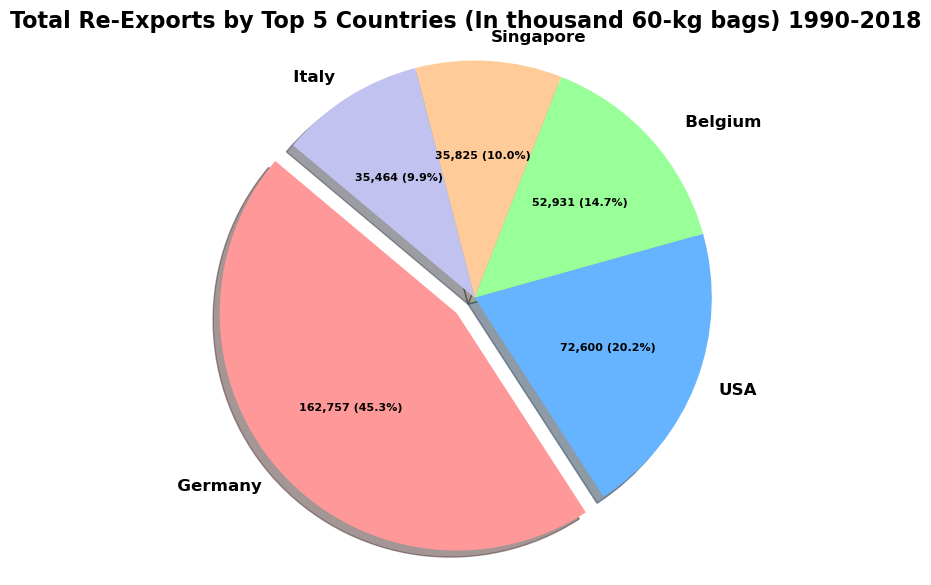

In [8]:
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes), startangle=140, explode=explode, shadow=True)

ax.axis('equal')

ax.set_title('Total Re-Exports by Top 5 Countries (In thousand 60-kg bags) 1990-2018', fontsize=16, fontweight='bold')

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold') 

for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold') 

plt.savefig('static/images/exports_pie_chart.png')    

plt.show()